# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0381 Михайлов Виктор. Вариант №12

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [2]:
install.packages("statnet")
install.packages("igraph")

library(igraph)
library(statnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolveAPI’, ‘rle’, ‘tergm’, ‘ergm.count’, ‘sna’, ‘tsna’, ‘ergm’, ‘network’, ‘networkDynamic’, ‘statnet.common’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: tergm

Loading required package: ergm

Loading required package: network


‘network’ 1.18.0 (2022-10-05), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information



Attaching package: ‘network’


The following objects are masked from ‘package:igraph’:

    %c%, %s%, add.edges, add.vertices, de

In [33]:
g <- 66
p <- 0.59
P0 <- 0.66
alpha <- 0.02

1. С помощью библиотеки igraph смоделировать случайный орграф $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}_d(g, p)$, где $g$ - количество акторов, $p$ - вероятность появления дуги между акторами. $g = 66, p = 0.59$.

In [7]:
# set.seed(1) #Для воспроизводимости примера

graph <- erdos.renyi.game(g, p, "gnp", directed = T)
net <- network(as_adjacency_matrix(graph), directed = T)

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



В данном задании используется вариант $\mathscr{G}(g, p)$, в которой граф строится путём случайного добавления рёбер. Вероятность построить граф с $g$ узлами и $M$ рёбрами равна:

$p^M (1-p)^{C^2_n - M}$.

По мере роста параметра $p$ от 0 к 1 модель включает с большей вероятностью графы с большим числом рёбер.

2. Отобразим полученный орграф.

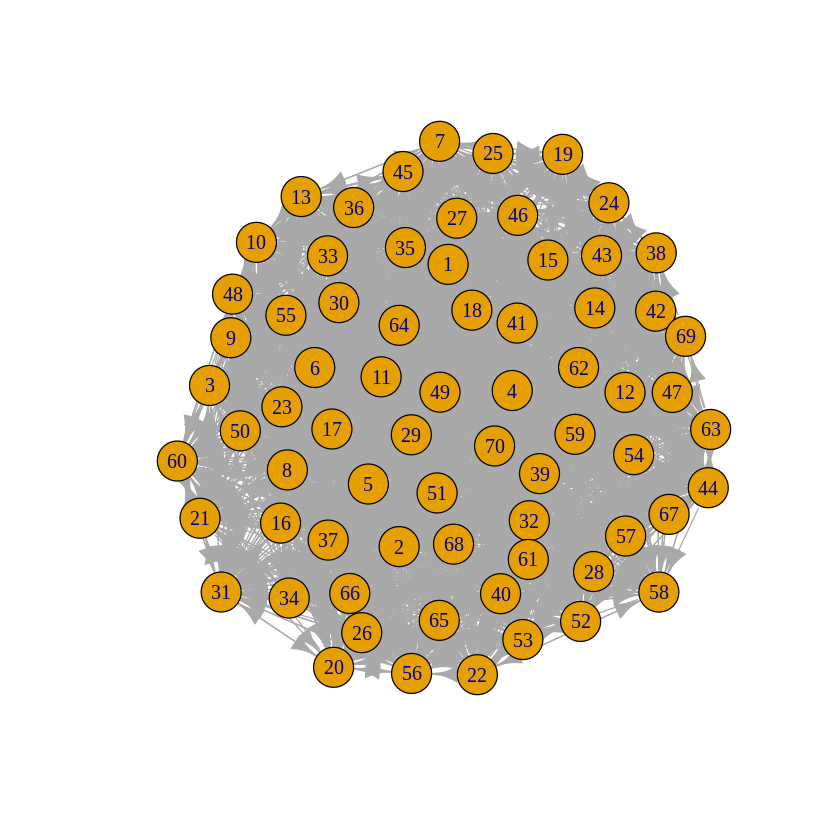

In [8]:
plot(graph)

3. Вычислим пятичисловую сводку сети для данного графа.

In [26]:
#Размер сети
cat("Размер сети: ", network.size(net), "\n")

#Плотность
cat("Плотность сети: ", gden(net), "\n")

#Компоненты
cat("Число компонент: ", components(net), "\n")

#Диаметр сети
cat("Диаметр сети: ", diameter(graph), "\n")

#Коэффициент кластеризации
cat("Коэффициент кластеризации: ", gtrans(net, mode = "graph"), "\n")

Размер сети:  70 
Плотность сети:  0.6171843 
Число компонент:  1 
Диаметр сети:  2 
Коэффициент кластеризации:  0.6158416 


4. Вычислить цензус диад.

In [14]:
census <- dyad_census(graph)
census

$mut
[1] 912

$asym
[1] 1157

$null
[1] 346

**Выводы**: число двунаправленных диад — 912, однонаправленных — 1157, число пар акторов без связи — 346.

5. Вычислим оценку индекса взаимности Каца-Пауэла при фиксированом количестве выборов 𝑑.

In [15]:
#При фиксированном выборе
d <- 0.5*g
fix_case <- (2*(g-1)*census$mut-g*d*d)/(g*d*(g-1-d))
fix_case

[1] 0.4814646

In [18]:
#При свободном выборе
matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(matrix))
L2 <- sum(rowSums(matrix)^2)

flex_case <- (2*(g - 1)^2 * census$mut - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)
flex_case

[1] -0.0136675

**Выводы**: при фиксированном выборе акторы более склонны образовывать взаимные связи, а при свободном — односторонние связи или не образовывать их вообще.

6. Вычислим вероятность того, что связь будет взаимной для каждого случая.

In [19]:
#Вероятность для фиксированного случая
fix_prob <- (d / (g-1)) * ((d/(g-1)) + fix_case*(g - 1 - d) / (g - 1))
fix_prob

[1] 0.3776398

In [20]:
#Вероятность для свободного выбора
flex_prob <- (rowSums(matrix) * colSums(matrix))/(g - 1)^2
flex_prob_avg <- sum(flex_prob)/g
flex_prob_avg
     

[1] 0.3812644

7. Вычислим индекс взаимности Бандиопадхьяйя.

In [21]:
g_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    min_sum <- 0   
    for (i in (t+1):g) {
        min_sum <- min_sum + min(c(t, row_sum[i]))
    }
    res <- xi_sum - t*(t-1) - min_sum
    return(res)
}

f_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    combination <- factorial(t)/(factorial(2) * factorial(t-2))
    res <- xi_sum - t*(g-1) - combination 
    return(res)
}

row_sum <- rowSums(matrix)

g_res <- rep(2, g - 1)
for (t in 2:(g-1)) {
    g_res[t] <- g_func(row_sum, g, t)
}

f_res <- rep(2, g)
for (t in 2:g) {
    f_res[t] <- f_func(row_sum, g, t)
}

M_max <- floor(0.5 * sum(row_sum[1:g]) - max(g_res))
M_min <- max(f_res)

Bandiopadhyaya <- (census$mut - M_min)/(M_max - M_min)
Bandiopadhyaya

[1] 0.6123822

**Выводы**: полученный индекс равен примерно 0.6

8. Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1), \frac{1}{2})$ при уровне значимости $\alpha = 0.02$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [37]:
l <- sum(matrix)
binom.test(l, g*(g-1), 0.5)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2981, number of trials = 4290, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6808471 0.7086307
sample estimates:
probability of success 
             0.6948718 


**Выводы:** p-value сильно меньше, чем заданный уровень значимости, откуда следует, что нулевая гипотеза отвергается; максимальный уровень значимости при котором гипотеза не отвергается крайне мал (< 2.2e-16)

9. Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 𝑃_0), P_0 = 0.66$ при уровне значимости $\alpha = 0.02$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [34]:
binom.test(l, g*(g-1), P0)


	Exact binomial test

data:  l and g * (g - 1)
number of successes = 2981, number of trials = 4290, p-value =
1.218e-06
alternative hypothesis: true probability of success is not equal to 0.66
95 percent confidence interval:
 0.6808471 0.7086307
sample estimates:
probability of success 
             0.6948718 


**Выводы:** p-value вновь ниже заданного уровня значимости, а значит гипотеза отвергается; максимальный уровень значимости при котором гипотеза выполняется в этот раз больше, но всё ещё низок.

10. Построим доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1 - \alpha)$.

In [24]:
#Оценка параметра p
est <- (sum(matrix))/(g*(g-1))
est

#z alpha/2
laplace_func <- 0.5 - (alpha/2)
laplace_func

#Исходя из значений в таблице функции Лапласа =>
z_a <- 2.34

#Доверительный интервал
lower <- est - z_a * sqrt((est * (1 - est))/(g * (g - 1)))
upper <- est + z_a * sqrt((est * (1 - est))/(g * (g - 1)))                      
lower
upper
     

[1] 0.6171843

[1] 0.49

[1] 0.6008182

[1] 0.6335503

**Выводы:** Получаем доверительный интервал $0.6 \leqslant p \leqslant 0.63$. 

## Выводы

В ходе данной практической работы провели статистический анализ случайно смоделированного ориентированного графа с использованием библиотек igraph,  statnet и встроенных функций языка R. Для графа были посчитаны оценки индексов, описывающих его диады(их количество и т.д.), вероятности возникновения взаимных диад, а также опровергнуты 2 теории о распределении диад. Были построены доверительные интервалы для оценки вероятности возникновения диады между 2 рёбрами.